# Test 4 SOM on Kepler and TESS Data

The fourth test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out under-sampling to balance the dataset, eliminating some anomalous features and initializing the weights of the SOM with 50% composites from values ​​of Planets taken randomly, and 50% False Planets.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [35]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [36]:
X_train = X_train.drop(columns=['Unnamed: 0','Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
                                'Stellar log(g) (cm/s^2)', 'TESS Mag'])
y_train = y_train.drop(columns='Unnamed: 0')

In [37]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [38]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err']

In [39]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 13)
Shape of y_train: (10804, 1)


In [40]:
X_train = X_train.values
y_train = y_train.values

In [41]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  13


# Grid Search

In [42]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [1],
    'W_FALSE_PLANET': [1],
    'K': [7, 11]
}

In [43]:
# grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
# best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

# print("Best param:", best_param)
# print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 6,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x2b73046478b0>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b7304647940>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7662817551963048
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 30, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'W_PLANET': 1, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7612216566404443

In [44]:
best_param = {}
best_param['W'] = None
best_param['max_iter'] = 100000
best_param['num_rows'] = 30
best_param['num_cols'] = 30
best_param['max_learning_rate'] = 0.8
best_param['max_distance'] = 10
best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
best_param['distance_nr'] = DistanceMetrics.manhattan_distance
best_param['W_PLANET'] = 1
best_param['W_FALSE_PLANET'] = 1
best_param['K'] = 11

In [45]:
W = best_param['W']
max_iter = 100000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [46]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000001  | LR:    0.800000  | NR:   10.000000  | Time:    0.013499


Iteration:  01000  | QE:    0.000006  | LR:    0.792008  | NR:   10.000000  | Time:    7.990360
Iteration:  02000  | QE:    0.000013  | LR:    0.784008  | NR:   10.000000  | Time:    7.550001
Iteration:  03000  | QE:    0.000002  | LR:    0.776008  | NR:   10.000000  | Time:    8.360147
Iteration:  04000  | QE:    0.000002  | LR:    0.768008  | NR:   10.000000  | Time:   10.912180
Iteration:  05000  | QE:    0.000004  | LR:    0.760008  | NR:   10.000000  | Time:    8.829117
Iteration:  06000  | QE:    0.000004  | LR:    0.752008  | NR:   10.000000  | Time:    8.587599
Iteration:  07000  | QE:    0.000002  | LR:    0.744008  | NR:   10.000000  | Time:    9.190083
Iteration:  08000  | QE:    0.000001  | LR:    0.736008  | NR:   10.000000  | Time:    8.896828
Iteration:  09000  | QE:    0.000001  | LR:    0.728008  | NR:   10.000000  | Time:    8.703470
Iteration:  10000  | QE:    0.000036  | LR:    0.720008  | NR:   10.000000  | Time:    8.602858
Iteration:  11000  | QE:    0.000018  | 

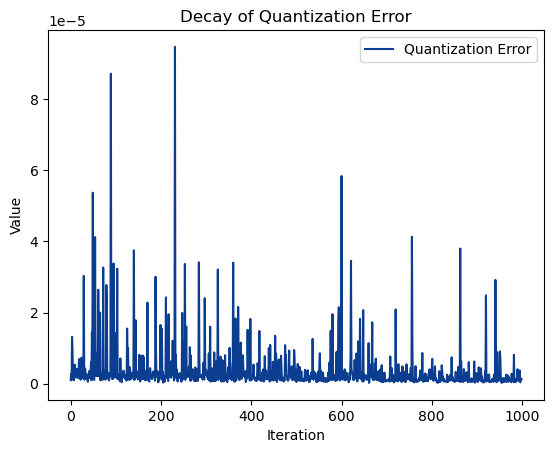

In [47]:
REDUCE = 100
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

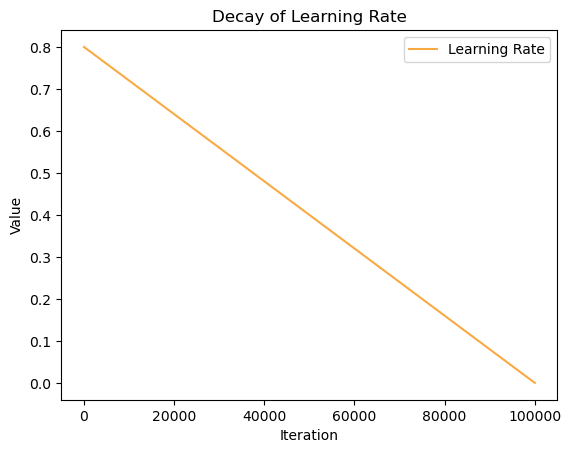

In [48]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

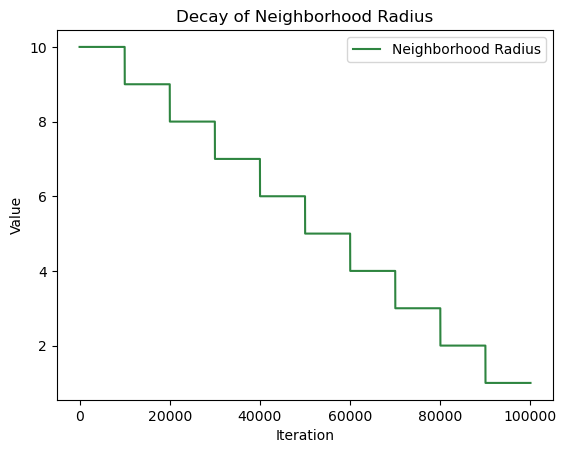

In [49]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

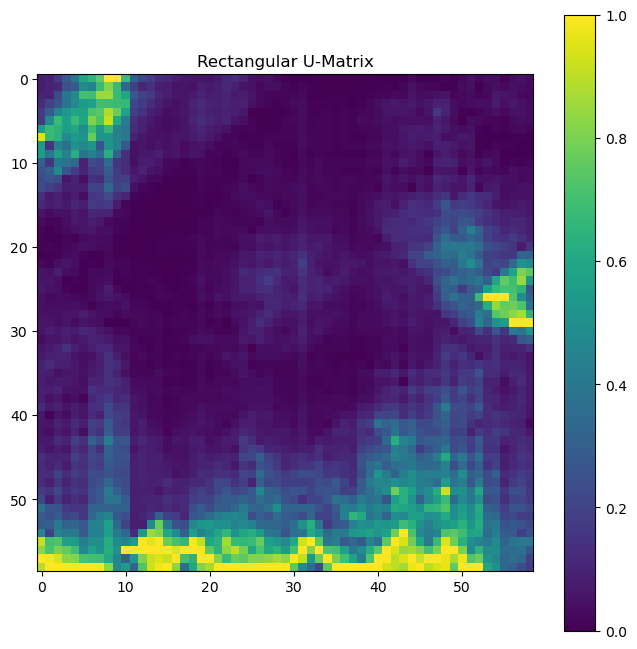

In [50]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

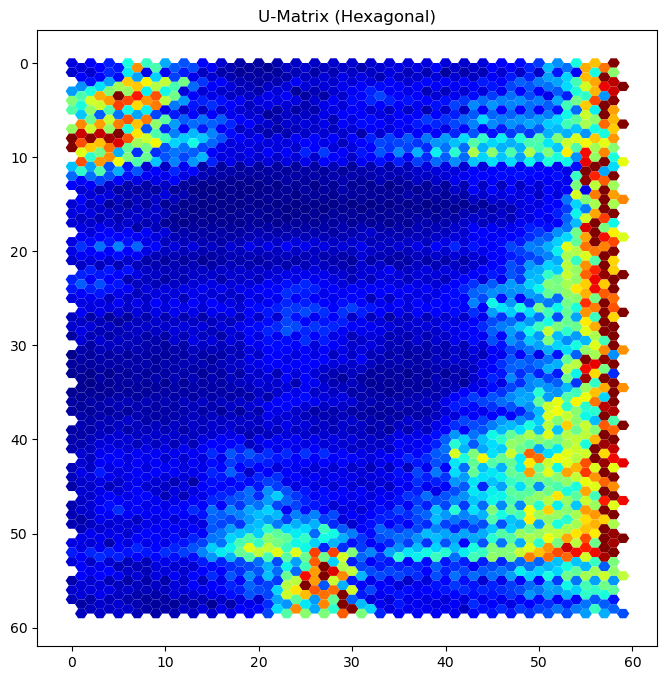

In [51]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

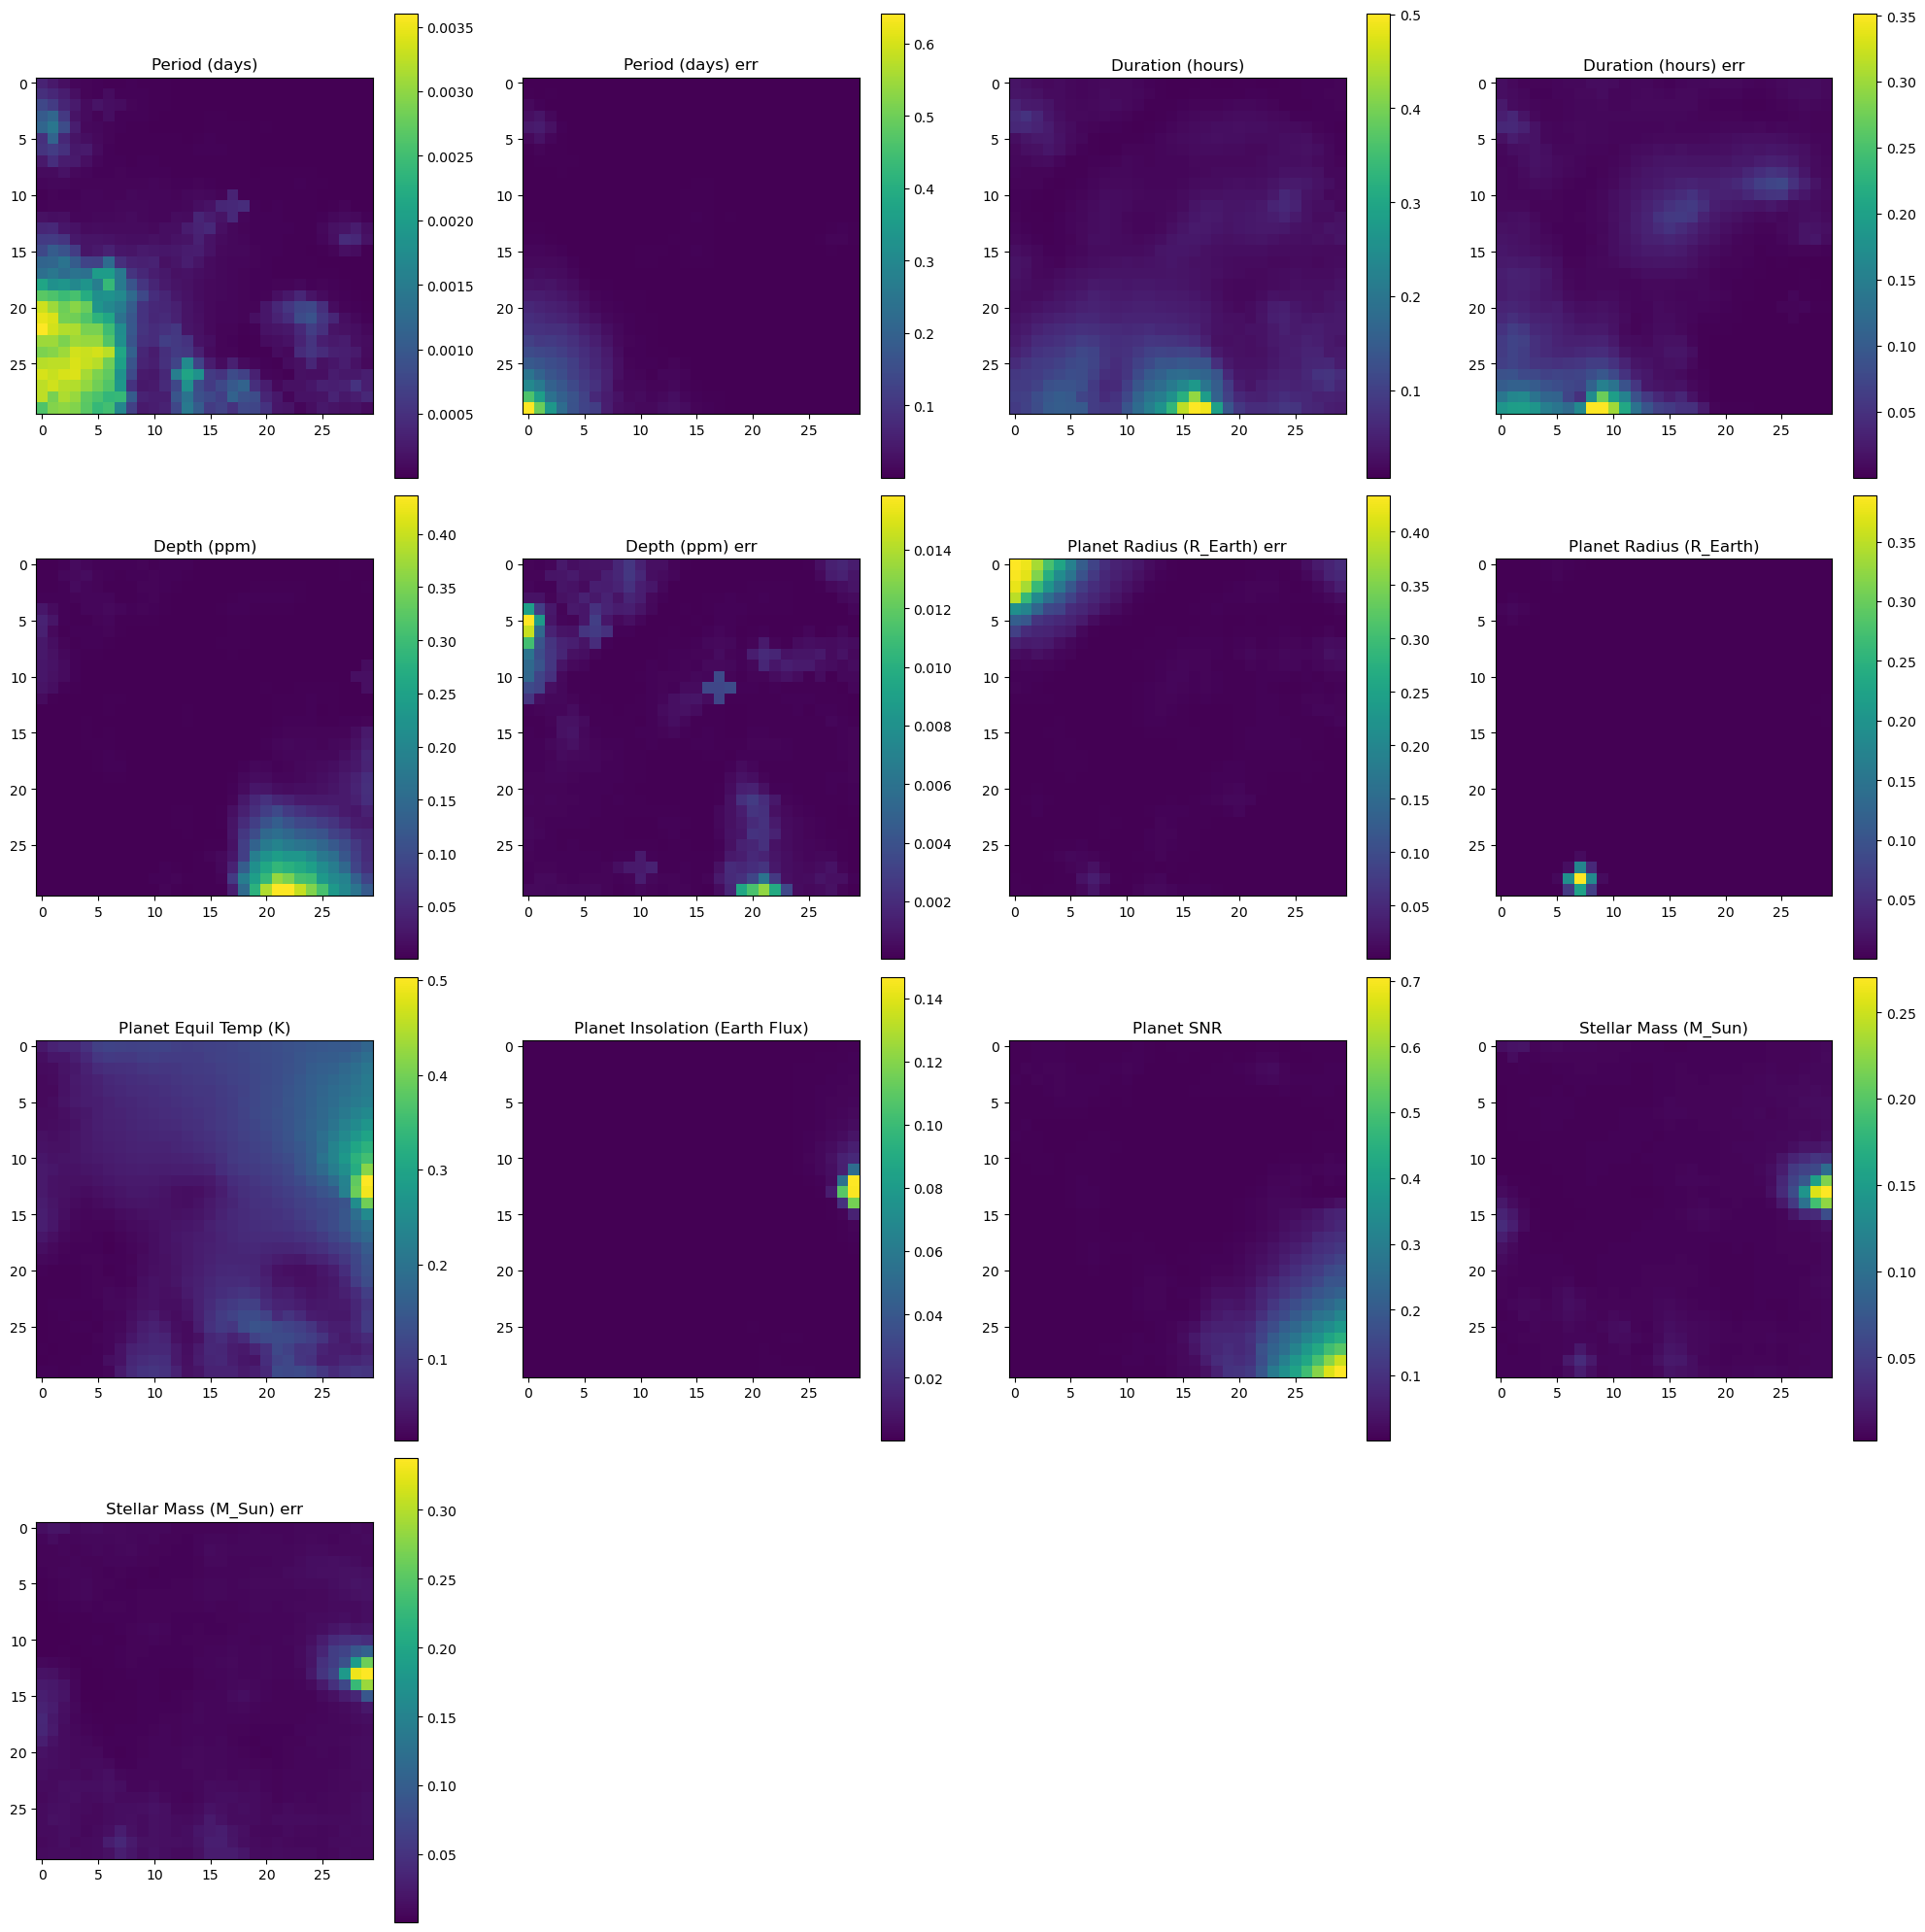

In [52]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [53]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(29, 25)-> Planet:   0, False Planet:   5
(0, 24) -> Planet:   0, False Planet:  19
(14, 10)-> Planet:  10, False Planet:   0
(16, 21)-> Planet:  23, False Planet:   0
(20, 17)-> Planet:   0, False Planet:  14
(23, 29)-> Planet:   0, False Planet:   6
(23, 26)-> Planet:   0, False Planet:   9
(11, 8) -> Planet:  16, False Planet:   0
(0, 18) -> Planet:  13, False Planet:   0
(16, 27)-> Planet:   0, False Planet:  10
(29, 16)-> Planet:   0, False Planet:   9
(20, 10)-> Planet:   6, False Planet:   0
(16, 13)-> Planet:  14, False Planet:   0
(21, 25)-> Planet:   0, False Planet:   8
(13, 23)-> Planet:  13, False Planet:   0
(24, 3) -> Planet:   0, False Planet:  11
(12, 15)-> Planet:  15, False Planet:   0
(0, 29) -> Planet:   0, False Planet:   5
(11, 17)-> Planet:   0, False Planet:  12
(13, 10)-> Planet:  18, False Planet:   0
(17, 18)-> Planet:   0, False Planet:  24
(3, 2)  -> Planet:   0, False Planet:   6
(3, 12) -> Planet:  12, False Planet:   0
(6, 8)  -> Planet:  23, False Plan

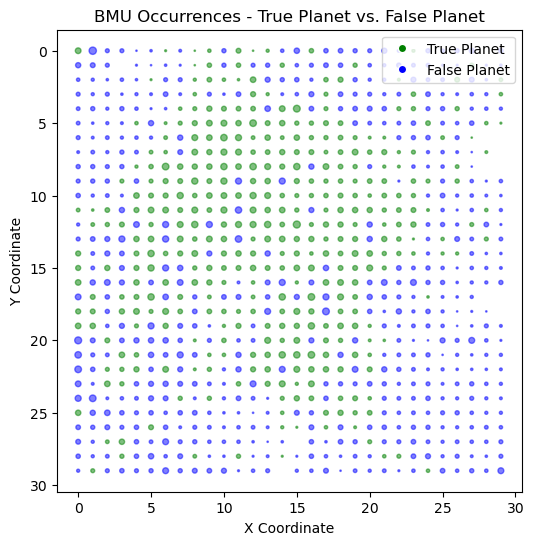

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [55]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

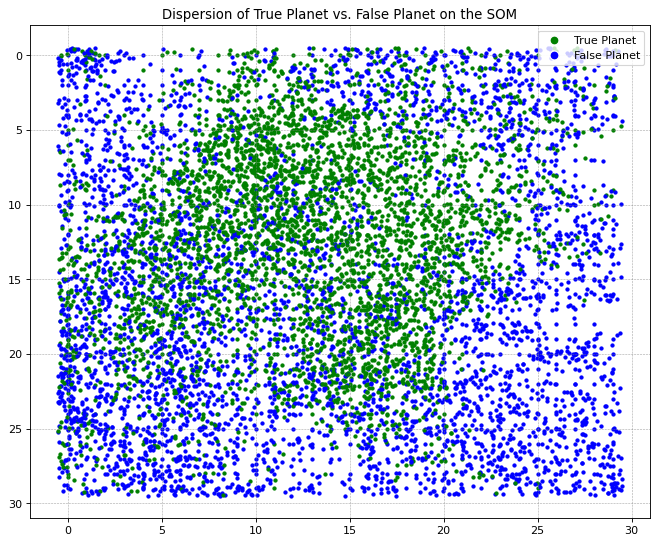

In [56]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

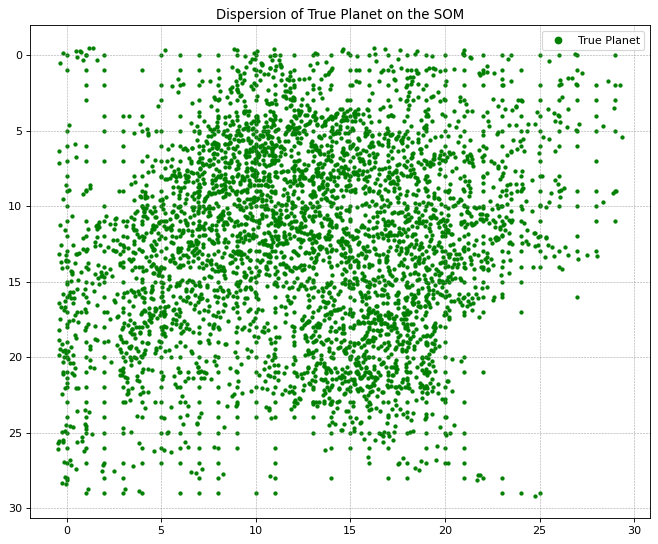

In [57]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

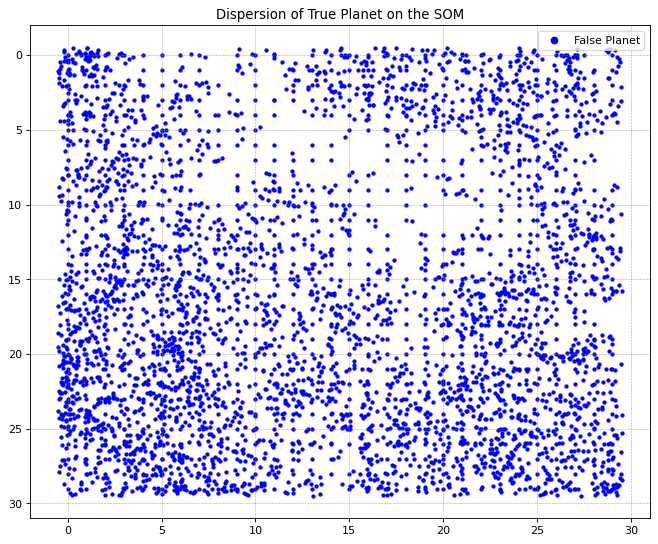

In [58]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

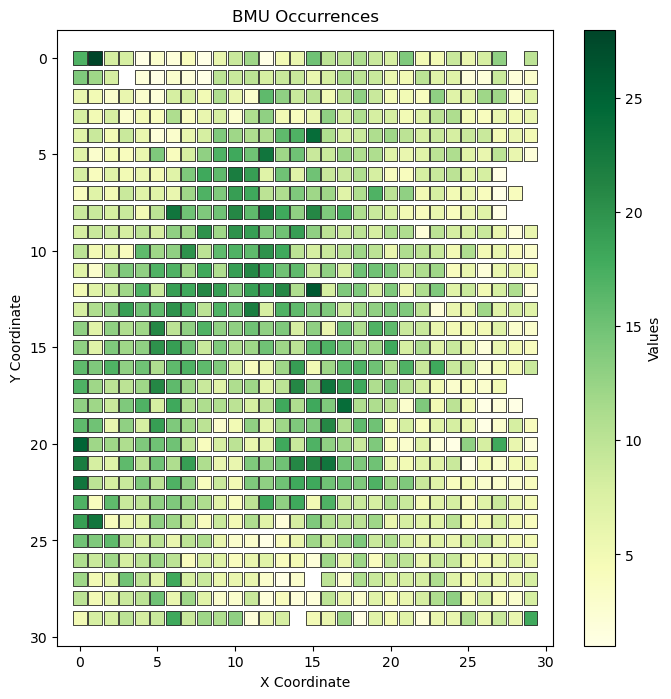

In [59]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

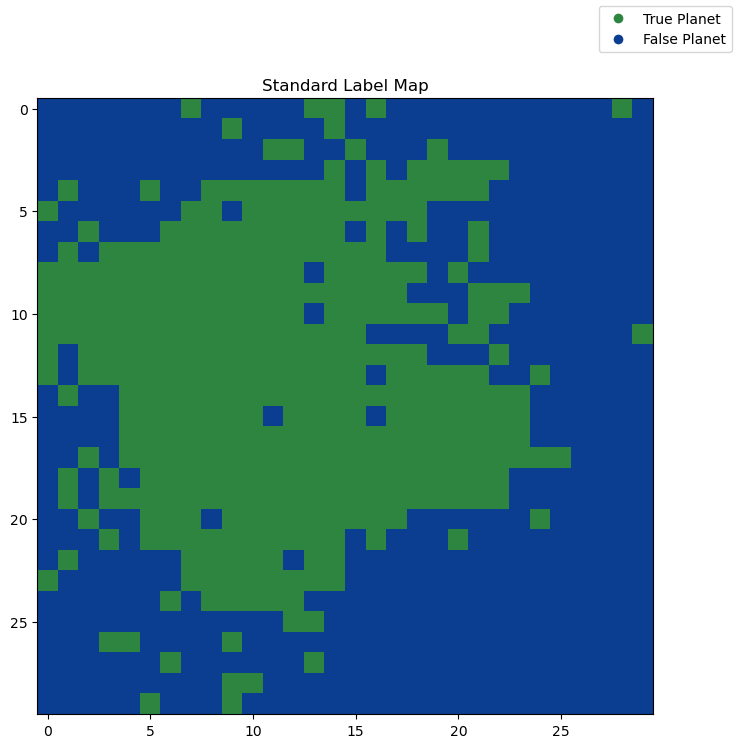

In [60]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

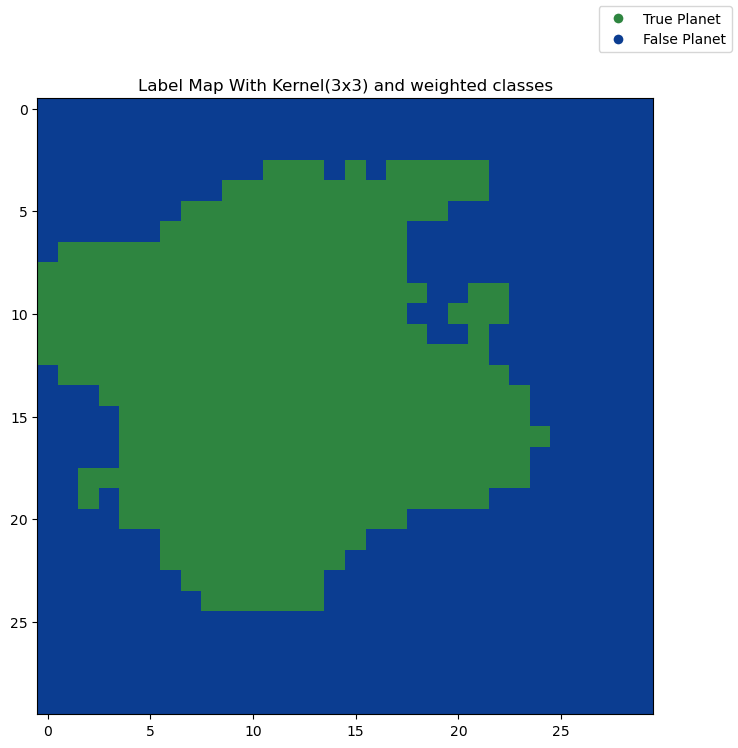

In [61]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

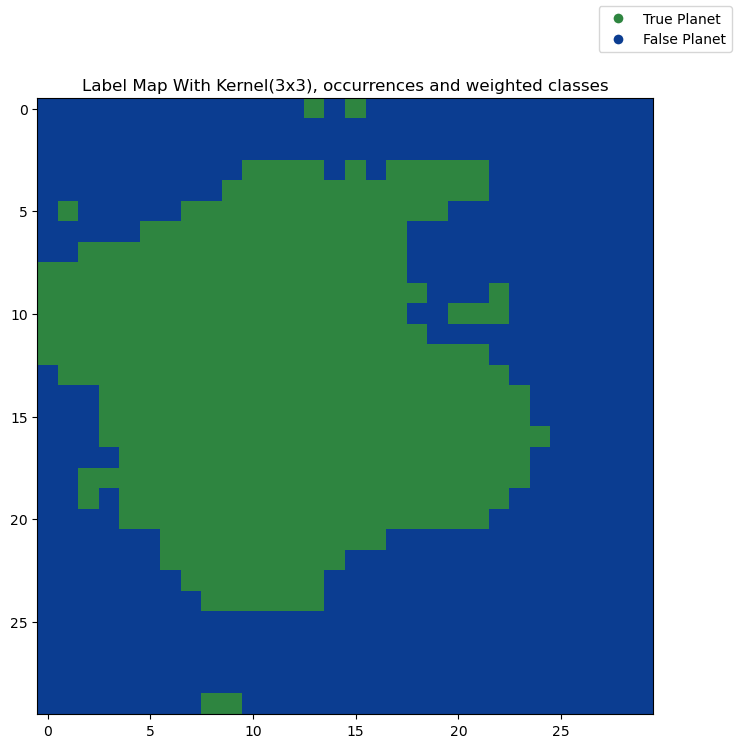

In [62]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7552059231837113
F1-score: 0.7598729005901044
Precision: 0.7342105263157894
Recall: 0.7873941674506115
cm:  [[795 303]
 [226 837]]


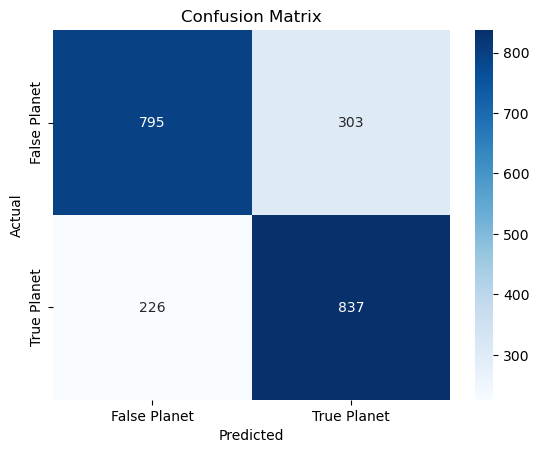

In [63]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7547431744562703
F1-score: 0.757548032936871
Precision: 0.7373107747105966
Recall: 0.7789275634995296
cm:  [[803 295]
 [235 828]]


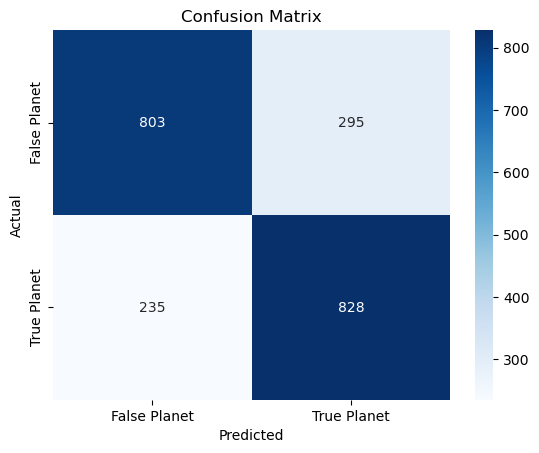

In [64]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7482646922720962
F1-score: 0.7520510483135825
Precision: 0.7294429708222812
Recall: 0.7761053621825024
cm:  [[792 306]
 [238 825]]


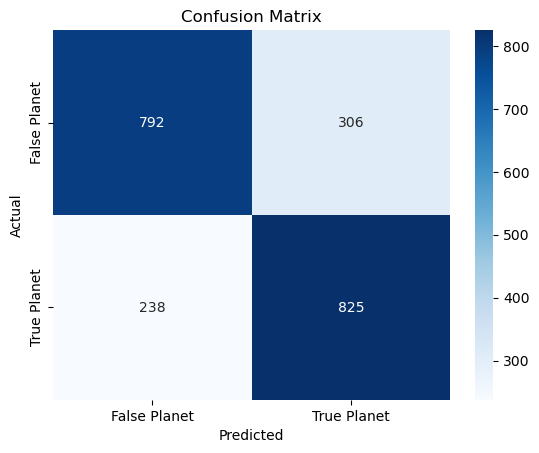

In [65]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7570569180934752
F1-score: 0.7595052679798443
Precision: 0.7401785714285715
Recall: 0.779868297271872
cm:  [[807 291]
 [234 829]]


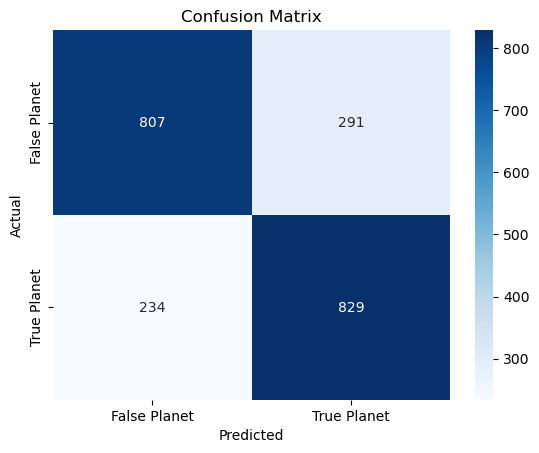

In [66]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)